### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos
***
## Investigando Distribuciones

Mateo Neira
***

# Pruebas de Hipótesis y Regresión Lineal

**Objetivo:** Aplicar pruebas estadísticas para tomar decisiones basadas en datos y construir un modelo de regresión lineal simple para explorar relaciones entre variables.

## Creación de un Dataset Simulado

Para nuestros ejemplos, crearemos un DataFrame con datos simulados de propiedades. Esto nos da un entorno controlado para aplicar las pruebas.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Configuración de estilo
sns.set_theme(style="whitegrid")

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

# Crear datos
n_propiedades = 200
data = {
    'area_m2': np.random.normal(100, 20, n_propiedades).clip(30), # Área media 100m2, desv 20
    'zona': np.random.choice(['A', 'B'], n_propiedades, p=[0.5, 0.5]),
}
df = pd.DataFrame(data)

# Generar precio basado en área y zona
# Las propiedades en la Zona B serán, en promedio, más caras
precio_base_A = df['area_m2'] * 1200 
precio_base_B = df['area_m2'] * 1500
ruido = np.random.normal(0, 20000, n_propiedades) # Ruido aleatorio

df['precio'] = np.where(df['zona'] == 'A', precio_base_A, precio_base_B) + ruido

# Generar si tiene balcón
# Mayor probabilidad de tener balcón en la Zona B
prob_balcon_A = 0.3
prob_balcon_B = 0.6
df['tiene_balcon'] = np.where(
    df['zona'] == 'A',
    np.random.choice(['Sí', 'No'], size=n_propiedades, p=[prob_balcon_A, 1-prob_balcon_A]),
    np.random.choice(['Sí', 'No'], size=n_propiedades, p=[prob_balcon_B, 1-prob_balcon_B])
)


print("Primeras 5 filas del dataset:")
print(df.head())
print("\nDescripción del dataset:")
print(df.describe())
print("\nPrecios medios por zona:")
print(df.groupby('zona')['precio'].mean())

Primeras 5 filas del dataset:
      area_m2 zona         precio tiene_balcon
0  109.934283    B  162726.221621           Sí
1   97.234714    B  153886.305407           Sí
2  112.953771    B  183233.535977           Sí
3  130.460597    B  187666.486255           No
4   95.316933    A  118862.168643           No

Descripción del dataset:
          area_m2         precio
count  200.000000     200.000000
mean    99.184581  133571.325225
std     18.620078   35031.594923
min     47.605098   43645.669589
25%     85.897447  111155.481184
50%     99.916162  133668.119810
75%    110.017049  156365.221993
max    154.403383  242197.520852

Precios medios por zona:
zona
A    117113.939409
B    148762.758286
Name: precio, dtype: float64


## Análisis de Correlación

**Pregunta:** ¿Qué tan fuerte es la relación lineal entre el `area_m2` y el `precio` de una propiedad?

Coeficiente de Correlación de Pearson (r): 0.6846


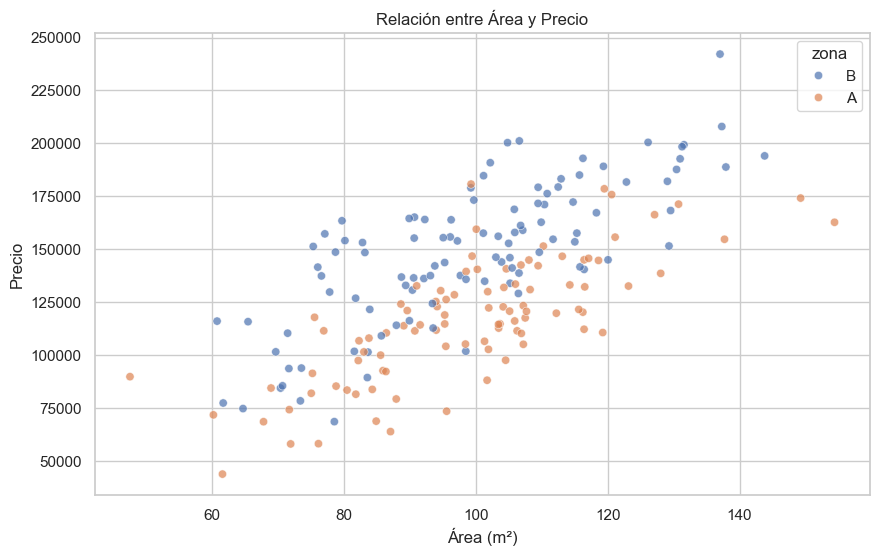

In [3]:
# Calcular la correlación de Pearson
correlacion, _ = stats.pearsonr(df['area_m2'], df['precio'])
print(f"Coeficiente de Correlación de Pearson (r): {correlacion:.4f}")

# Visualizar la relación con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_m2', y='precio', data=df, hue='zona', alpha=0.7)
plt.title('Relación entre Área y Precio')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.show()

## Regresión Lineal Simple

**Objetivo:** Construir un modelo para predecir el `precio` basándonos en el `area_m2`.

**Ecuación:** `precio` = β₀ + β₁ * `area_m2`

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     174.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           5.29e-29
Time:                        17:10:22   Log-Likelihood:                -2312.8
No. Observations:                 200   AIC:                             4630.
Df Residuals:                     198   BIC:                             4636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5818.1210   9834.280      0.592      0.5

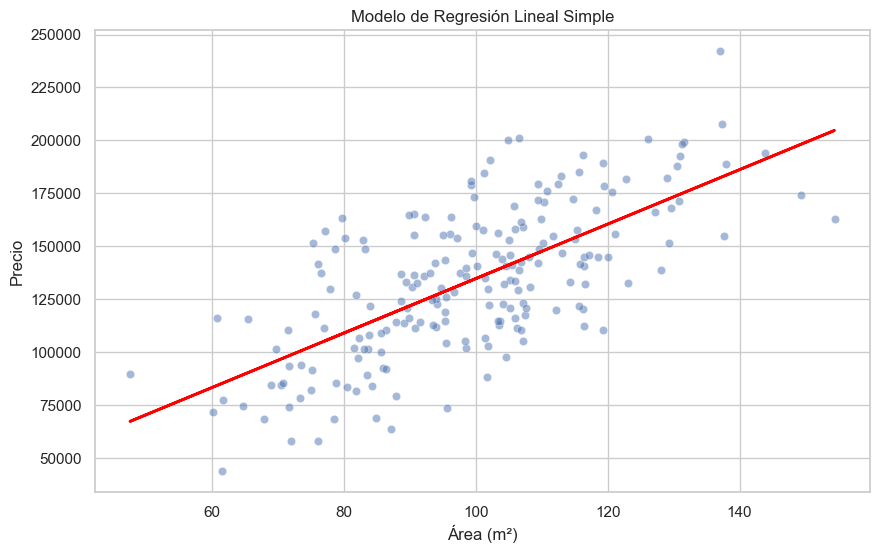

In [4]:
# Definir las variables
Y = df['precio']  # Variable dependiente
X = df['area_m2'] # Variable independiente

# Añadir una constante al modelo (para el intercepto β₀)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(Y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())

# Visualización del modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area_m2'], y=df['precio'], alpha=0.5)
# Línea de regresión
plt.plot(df['area_m2'], modelo.predict(X), color='red', linewidth=2)
plt.title('Modelo de Regresión Lineal Simple')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.show()

## Análisis de Residuos

Un supuesto clave de la regresión lineal es que los residuos (los errores del modelo) deben ser independientes, tener una media de cero, una varianza constante (homocedasticidad) y seguir una distribución normal.

Vamos a verificar visualmente si estos supuestos se cumplen.


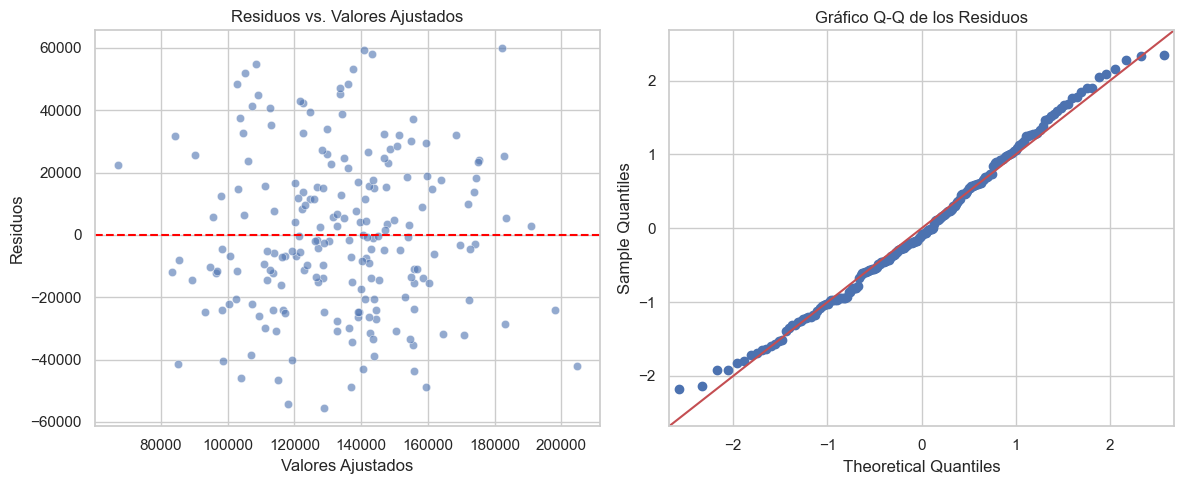

In [9]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Obtener los valores ajustados (predicciones)
valores_ajustados = modelo.fittedvalues

# 1. Gráfico de Residuos vs. Valores Ajustados (para Homocedasticidad)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')

# 2. Gráfico Q-Q (para Normalidad de los Residuos)
plt.subplot(1, 2, 2)
sm.qqplot(residuos, line='45', fit=True, ax=plt.gca())
plt.title('Gráfico Q-Q de los Residuos')

plt.tight_layout()
plt.show()


### Interpretación de los Gráficos de Residuos

1.  **Gráfico de Residuos vs. Valores Ajustados:**
    *   **Qué buscamos:** Buscamos que los puntos se distribuyan aleatoriamente alrededor de la línea horizontal en cero, sin patrones evidentes. La dispersión de los puntos debe ser más o menos constante a lo largo del eje x.
    *   **Qué significa:** Si vemos un patrón (como una forma de cono o una curva), indica **heterocedasticidad**, lo que significa que la varianza de los errores no es constante. Esto viola un supuesto del modelo y puede hacer que nuestras estimaciones de los coeficientes sean menos fiables. En nuestro caso, la distribución parece bastante aleatoria, lo cual es una buena señal.

2.  **Gráfico Q-Q (Cuantil-Cuantil):**
    *   **Qué buscamos:** Este gráfico compara los cuantiles de los residuos de nuestro modelo con los cuantiles de una distribución normal teórica.
    *   **Qué significa:**
        *   Si los puntos azules se alinean estrechamente con la línea roja diagonal, significa que los residuos siguen una distribución normal. Esto es lo que deseamos.
        *   Si los puntos se desvían sistemáticamente de la línea (formando una "S", por ejemplo), sugiere que los residuos no son normales.
    *   **En nuestro gráfico:** Los puntos se ajustan muy bien a la línea, lo que confirma visualmente que el supuesto de normalidad de los residuos se cumple. La prueba de Shapiro-Wilk, con un p-valor alto, refuerza esta conclusión.

# Ejercicio 
(BostonHousing_adj.csv)

1. Análisis Exploratorio de Datos (Exploratory Data Analysis, EDA)

    1.1 ¿Existen outliers (valores atípicos) en los datos?
    1.2 ¿Cómo se distribuyen las variables del dataset?
    1.3 Analiza las relaciones entre las variables explicativas y la variable objetivo MEDV.
    1.4 Identifica posibles correlaciones fuertes entre variables.
    1.5 ¿Hay variables que requieran transformación (por ejemplo, escalado o transformación logarítmica)?

2. Modelado de Regresión

    2.1 Construye modelos simples de regresión lineal para intentar predecir el precio de las viviendas (MEDV) utilizando una sola variable explicativa cada vez.

    2.2 Adicionalmente, intenta construir un modelo de regresión lineal múltiple utilizando varias variables explicativas.

Evalúa el desempeño de los modelos y comenta los resultados.

## Boston House Price Dataset

El dataset (Boston Housing Price histórico) fue obtenido de la biblioteca StatLib, mantenida por la Universidad Carnegie Mellon, y está disponible gratuitamente a través del UCI Machine Learning Repository.

El dataset contiene 506 observaciones y 13 atributos (1 atributo fue eliminado).
La variable objetivo es el valor mediano del precio de la vivienda en miles de dólares ($10,000), denotado por MEDV.

A continuación se presenta una breve descripción de cada variable:

CRIM – tasa de criminalidad per cápita por ciudad

ZN – proporción de suelo residencial zonificado para lotes mayores a 25,000 pies cuadrados

CHAS – variable dummy del río Charles (1 si el área limita con el río; 0 en caso contrario)

NOX – concentración de óxidos nítricos (partes por cada 10 millones)

RM – número promedio de habitaciones por vivienda

AGE – proporción de viviendas ocupadas por propietarios construidas antes de 1940

DIS – distancias ponderadas a cinco centros de empleo de Boston

RAD – índice de accesibilidad a autopistas radiales

INDUS – proporción de acres de negocios no comerciales por ciudad

TAX – tasa de impuesto a la propiedad por cada 10,000

PTRATIO – proporción alumno-profesor por ciudad

LSTAT – porcentaje de población de bajos ingresos

MEDV – valor mediano de las viviendas ocupadas por propietarios (en $10,000)

Creadores: Harrison, D. y Rubinfeld, D. L.

Este dataset es una copia del conjunto de datos de vivienda del UCI ML Repository:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/